# Importar las librerías

In [163]:
from google.colab import drive
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import os
import numpy as np
import cv2
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

In [164]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Pre procesado de datos

### Cargar el dataset

In [165]:
# Definicion de directorio train y test
train_dir = '/content/drive/MyDrive/DataScience/ChallengerHenry/ClasificadorHuesos/train'
test_dir = '/content/drive/MyDrive/DataScience/ChallengerHenry/ClasificadorHuesos/test'

print(os.listdir(train_dir))
print(os.listdir(test_dir))

['Sano', 'Fracturado']
['Sano', 'Fracturado']


In [166]:
# Definicion de categorias 0 -> SAno y 1 -> Fractura
clases = ['Sano','Fracturado']

# Definicion de pixeles de la imagen
TARGET_SIZE = 100

# Normalización de las imágenes

In [167]:
# Funcion que establece un conjunto de características o propiedades a cada
# imagen con el proposito de facilitar su gestión, análisis y uso posterior utilizacion

def cargar_datos_desde_directorio(directorio):
    imagenes = []
    etiquetas = []

    for etiqueta in clases:
        ruta_directorio = os.path.join(directorio, etiqueta)
        for archivo in os.listdir(ruta_directorio):
            if archivo.endswith('.png') or archivo.endswith('.jpg'):
                ruta_imagen = os.path.join(ruta_directorio, archivo)
                imagen = load_img(ruta_imagen, target_size=(TARGET_SIZE, TARGET_SIZE))
                arreglo_imagenes = img_to_array(imagen) / 255.0
                imagenes.append(arreglo_imagenes)
                etiquetas.append(0 if etiqueta == 'Sano' else 1)
    return np.array(imagenes), np.array(etiquetas)

In [168]:
# Cargar datos de entrenamiento y prueba
X_train, y_train = cargar_datos_desde_directorio(train_dir)
X_test, y_test = cargar_datos_desde_directorio(test_dir)

In [169]:
print(f"Dimensiones : X_train {X_train.shape} | y_train {y_train.shape}" )
print(f"Dimensiones : X_train {X_test.shape} | y_train {y_test.shape}" )

Dimensiones : X_train (555, 100, 100, 3) | y_train (555,)
Dimensiones : X_train (555, 100, 100, 3) | y_train (555,)


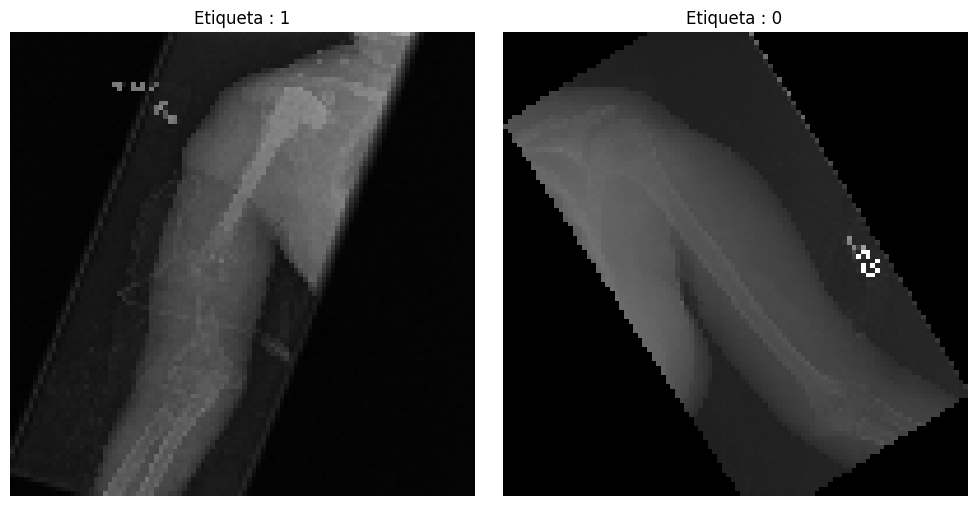

In [170]:
# Seleccionar dos imagenes del conjunto para ser mostrados
random_indices = np.random.choice(len(X_train), size=2, replace=False)

# Inicializar listas para las imágenes y etiquetas
imagenes = []
etiquetas = []

# Obtener imágenes y etiquetas que se mostraran
for indice in random_indices:
    imagenes.append(X_train[indice])
    etiquetas.append(f'Etiqueta : {y_train[indice]}')

# Mostrar las imágenes
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
for ax, imagen, etiqueta in zip(axes, imagenes, etiquetas):
    ax.imshow(imagen)
    ax.set_title(etiqueta)
    ax.axis('off')

plt.tight_layout()
plt.show()

# Construir la red neuronal convolucional

## Definir el modelo

In [180]:
modelo = tf.keras.models.Sequential()

### Añadir la primera capa de convolución

| **Hiperparametro**                | **Descripción**                                                                                   |
|------------------------------|---------------------------------------------------------------------------------------------------|
| **Filtros**: 32                 | también conocidos como kernels, se aplican a la imagen a través de una operación llamada convolución |
| **Tamaño del kernel**: 3        | es una pequeña matriz de pesos que se utiliza para realizar la operación de convolución sobre los datos de entrada |
| **Padding**: same                  | es una técnica utilizada para controlar el tamaño de la salida después de aplicar una operación de convolución |
| **Función de Activación**: relu    | es una de las funciones de activación más utilizadas en redes neuronales profundas Si x > 0, entonces x, sino .                                   |
| **input_shape**: (32, 32, 3)             |  se refiere a la estructura y dimensiones de los datos que se alimentan a una red neuronal                                                                                    |

In [181]:
modelo.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[TARGET_SIZE, TARGET_SIZE, 3]))

### Agregar segunda capa de convolucional y capa max-pooling
| **Hiperparametro**                | **Descripción**                                                                                   |
|------------------------------|---------------------------------------------------------------------------------------------------|
| **Filtros**: 32                 |  |
| **Tamaño del kernel**: 3        |  |
| **Padding**: same                  |  |
| **Función de Activación**: relu    |                                    |


                                                                  

In [182]:
modelo.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

| **Hiperparametro de la capa de MaxPool**                |                                                                                    |
|------------------------------|---------------------------------------------------------------------------------------------------|
| **pool_size**: 2                 | se refiere al tamaño de la ventana que se utiliza en la operación de pooling (agrupamiento o submuestreo) |
| **strides**: 2        | el término strides se refiere a la cantidad de píxeles que se mueve la ventana de convolución (o pooling) a través de la imagen de entrada. |
| **padding**: valid                  |  |


In [183]:
modelo.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Añadir la tercera capa convolucional
| **Hiperparametro**                 |                                                                                    |
|------------------------------|---------------------------------------------------------------------------------------------------|
| **Filtros**: 64                 | |
| **Tamaño del kernel**: 3        |  |
| **padding**: same                  |  |
| **Función de Activación**: relu                  |  |

In [184]:
 modelo.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

###  Añadir la cuarta capa convolucional y la capa de max-pooling
| **Hiperparametro**                 |                                                                                    |
|------------------------------|---------------------------------------------------------------------------------------------------|
| **Filtros**: 64                 | |
| **Tamaño del kernel**: 3        |  |
| **padding**: same                  |  |
| **Función de Activación**: relu                  |  |

In [185]:
modelo.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

| **Hiperparametro de la capa de MaxPool**                |                                                                                    |
|------------------------------|---------------------------------------------------------------------------------------------------|
| **pool_size**: 2                 | se refiere al tamaño de la ventana que se utiliza en la operación de pooling (agrupamiento o submuestreo) |
| **strides**: 2        | el término strides se refiere a la cantidad de píxeles que se mueve la ventana de convolución (o pooling) a través de la imagen de entrada. |
| **padding**: valid                  |  |

In [186]:
modelo.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Añadir la capa de flattening


In [187]:
modelo.add(tf.keras.layers.Flatten())

### Añadir la primera capa fully-connected
| **Hiperparametro**                |                                                                                    |
|------------------------------|---------------------------------------------------------------------------------------------------|
| **units/neurons**: 128                 | En el contexto de una capa de una red neuronal, el término "units" se refiere al número de neuronas en esa capa |
| **activation**: relu        |  |


In [188]:
modelo.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Añadir la primera capa fully-connected
| **Hiperparametro**                |                                                                                    |
|------------------------------|---------------------------------------------------------------------------------------------------|
| **units/neurons**: 2 (number of classes)                 |  |
| **activation**: relu        |  |

In [189]:
modelo.add(tf.keras.layers.Dense(units=2, activation='softmax'))

In [190]:
modelo.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)                   │ (None, 100, 100, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 100, 100, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 50, 50, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 50, 50, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 40000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │       5,120,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,185,954 (19.78 MB)

 Trainable params: 5,185,954 (19.78 MB)

 Non-trainable params: 0 (0.00 B)

# Compilar el modelo

In [191]:
modelo.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

# Guardar el modelo

In [192]:
# Guardar el modelo en un archivo HDF5
ruta = '/content/drive/MyDrive/DataScience/ChallengerHenry/ClasificadorHuesos/modelo'
modelo.save(os.path.join(ruta, 'clasificadorHSR.h5'))

# Cargar el modelo guardado
#modelo = load_model(os.path.join(ruta, 'clasificadorHSR.h5'))

# Entrenar el modelo

In [193]:
modelo.fit(X_train, y_train, epochs=5)

Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - loss: 0.7018 - sparse_categorical_accuracy: 0.5884
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - loss: 0.6741 - sparse_categorical_accuracy: 0.6690
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - loss: 0.6242 - sparse_categorical_accuracy: 0.6946
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - loss: 0.5312 - sparse_categorical_accuracy: 0.7222
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - loss: 0.4758 - sparse_categorical_accuracy: 0.7648


In [194]:
test_loss, test_accuracy = modelo.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 450ms/step - loss: 0.5884 - sparse_categorical_accuracy: 0.7797


In [197]:
print(f"Precisión de la prueba: {test_accuracy}")

Precisión de la prueba: 0.6360360383987427


# Predecir

In [198]:
def preprocesar_(ruta_imagen):
    imagen = image.load_img(ruta_imagen, target_size=(100, 100))
    imagen_array = image.img_to_array(imagen)
    imagen_array = np.expand_dims(imagen_array, axis=0)
    imagen_array /= 255.0

    return imagen_array

In [199]:
ruta_imagen = '/content/drive/MyDrive/DataScience/ChallengerHenry/ClasificadorHuesos/predecir/imagen_predecir4.jpg'

In [200]:
# Preprocesar la imagen
imagen_preprocesada = preprocesar_(ruta_imagen)
# Realizar la predicción
prediccion = modelo.predict(imagen_preprocesada)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


In [201]:
limite = 0.5
if prediccion[0][0] > limite:
    print("Predicción: Hueso Fracturado")
else:
    print("Predicción: Hueso Sano")

Predicción: Hueso Fracturado


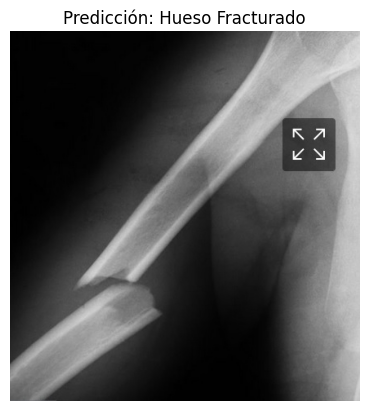

In [202]:
# Mostrar la imagen
plt.imshow(image.load_img(ruta_imagen))
plt.title("Predicción: " + ("Hueso Fracturado" if prediccion[0][0] > limite else "Hueso Sano"))
plt.axis('off')
plt.show()